In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c971a0d6f4f00bb33b96f76c082941e


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | sinnamary
Processing Record 4 of Set 1 | marsh harbour
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | banepa
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ponta pora
Processing Record 9 of Set 1 | carmo do paranaiba
Processing Record 10 of Set 1 | oistins
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | jalu
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | nadym
Processing Record 18 of Set 1 | guhagar
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | vitim
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | illoqqortoormiut
City 

Processing Record 38 of Set 4 | rameshki
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | ponta delgada
Processing Record 41 of Set 4 | bairiki
Processing Record 42 of Set 4 | akom
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | tigil
Processing Record 45 of Set 4 | cascais
Processing Record 46 of Set 4 | sheridan
Processing Record 47 of Set 4 | kloulklubed
Processing Record 48 of Set 4 | roebourne
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | malwan
City not found. Skipping...
Processing Record 2 of Set 5 | yaan
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | taltal
Processing Record 5 of Set 5 | grootfontein
Processing Record 6 of Set 5 | shakawe
Processing Record 7 of Set 5 | shelburne
Processing Record 8 of Set 5 | mahibadhoo
Processing Record 9 of Set 5 | vila franca do campo
Processing Record 10 of Set 5 | yamada
Processing Record 11 of Set 5

Processing Record 27 of Set 8 | cayenne
Processing Record 28 of Set 8 | caxias
Processing Record 29 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 8 | san luis
Processing Record 31 of Set 8 | bako
Processing Record 32 of Set 8 | wanning
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | beipiao
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | derzhavinsk
Processing Record 37 of Set 8 | freeport
Processing Record 38 of Set 8 | luganville
Processing Record 39 of Set 8 | kieta
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | qabis
City not found. Skipping...
Processing Record 42 of Set 8 | meadow lake
Processing Record 43 of Set 8 | fez
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | borama
City not found. Skipping...
Processing Record 46 of Set 8 | luena
Processing Record 47 of Set 8 | nguiu
City not found. Skipping...
Processing Recor

Processing Record 15 of Set 12 | banikoara
Processing Record 16 of Set 12 | quarteira
Processing Record 17 of Set 12 | agen
Processing Record 18 of Set 12 | sherbakul
Processing Record 19 of Set 12 | boa vista
Processing Record 20 of Set 12 | ijaki
City not found. Skipping...
Processing Record 21 of Set 12 | sorochinsk
Processing Record 22 of Set 12 | rio grande
Processing Record 23 of Set 12 | henties bay
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | simbahan
Processing Record 26 of Set 12 | sibsagar
Processing Record 27 of Set 12 | bridgeton
Processing Record 28 of Set 12 | green valley
Processing Record 29 of Set 12 | macenta
Processing Record 30 of Set 12 | sherlovaya gora
Processing Record 31 of Set 12 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,82.40,74,4,16.11,CK,2020-04-20 21:10:58
1,Vaini,-21.20,-175.20,78.80,83,75,8.05,TO,2020-04-20 21:11:00
2,Sinnamary,5.38,-52.95,79.79,83,100,8.08,GF,2020-04-20 21:13:33
3,Marsh Harbour,26.54,-77.06,83.86,68,100,22.88,BS,2020-04-20 21:13:33
4,Butaritari,3.07,172.79,82.44,79,100,13.15,KI,2020-04-20 21:10:53
5,Banepa,27.63,85.52,59.00,77,75,2.24,NP,2020-04-20 21:13:33
6,Rikitea,-23.12,-134.97,76.05,74,29,4.76,PF,2020-04-20 21:10:52
7,Ponta Pora,-22.54,-55.73,78.80,57,20,4.70,BR,2020-04-20 21:13:34
8,Carmo Do Paranaiba,-19.00,-46.32,69.01,100,26,5.06,BR,2020-04-20 21:13:34
9,Oistins,13.07,-59.53,77.00,78,75,18.34,BB,2020-04-20 21:12:31


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-04-20 21:10:58,-21.21,-159.78,82.40,74,4,16.11
1,Vaini,TO,2020-04-20 21:11:00,-21.20,-175.20,78.80,83,75,8.05
2,Sinnamary,GF,2020-04-20 21:13:33,5.38,-52.95,79.79,83,100,8.08
3,Marsh Harbour,BS,2020-04-20 21:13:33,26.54,-77.06,83.86,68,100,22.88
4,Butaritari,KI,2020-04-20 21:10:53,3.07,172.79,82.44,79,100,13.15
...,...,...,...,...,...,...,...,...,...
525,Bridgeton,US,2020-04-20 21:10:35,39.43,-75.23,59.00,47,20,6.93
526,Green Valley,US,2020-04-20 21:15:16,31.85,-110.99,82.99,12,1,3.36
527,Macenta,GN,2020-04-20 21:15:16,8.54,-9.47,71.53,77,100,0.11
528,Sherlovaya Gora,RU,2020-04-20 21:15:16,50.57,116.25,16.39,73,100,20.87


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/20/20'

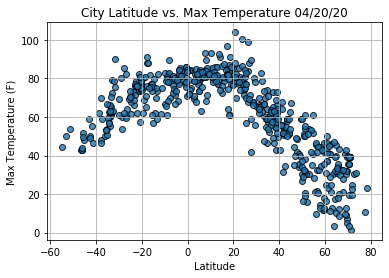

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

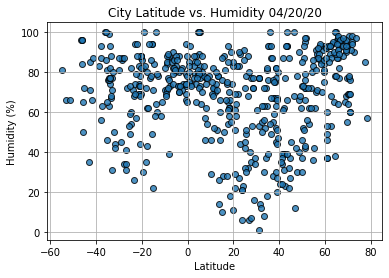

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

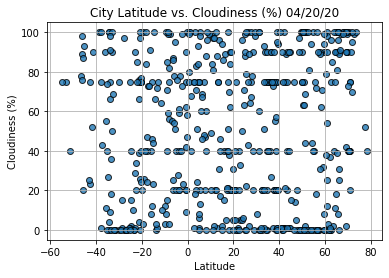

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

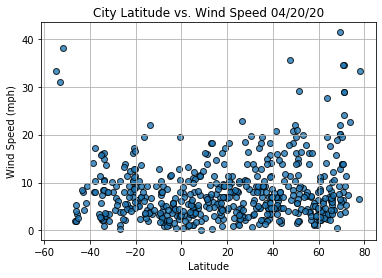

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()